# Riddler Express: Red Dead Redemption 2 
## Cigarette Cards

### The Problem

In the video game “Red Dead Redemption 2,” there is a side quest where the main character is supposed to collect 12 sets of cigarette cards, each consisting of 12 unique cards.

Some cards can be found lying around in the open world, but the easiest way to collect the cards is to buy cigarettes at the store and collect the single random card included in each pack. Suppose Arthur is too lazy to look for cards in the open world and tries to complete the set only by buying packs at the store.

At $5 a pack, how much money do we expect Arthur to spend to complete all 12 sets?

https://fivethirtyeight.com/features/youre-home-alone-you-can-buy-zillions-of-video-game-cigarettes-or-beat-yourself-at-bananagrams/

(Problem by Gerald Dorrer)

## Theory

- What do we expect this to give us?

All we care about is the number of cards we need to get. We have 12 sets each with 12 unique cards, so there are 144 cards to collect.

As we collect cards, it becomes harder and harder to find one that we don't already have. Let's look at how many cards it takes to get a new card we don't have yet.

Let $N_i$ be the number of cards it takes to get the (i + 1)th card. So $N_0$ is the number of cards it takes to get the first card, $N_{100}$ is the number of cards to get the 101st card, etc.

Let's look at $N_{100}$. In this state, we already have 100 cards and are buying packs to get our 101st card. Every time we get a new pack, two things could happen.

1. We get a new card we don't have yet
2. We get a card we already have

If we get a new card, great! We move on to getting another card we haven't seen. But, it we don't get a new card, it is like we haven't made any progress. We still have to keep drawing to get our 101st card. We have 100 cases where we have to keep drawing and 44 cases where we hit a new card. So, on average, we can write N_{100} as the following:

$N_{100} = \frac{100(1+N_{100})+44(1)}{144}$

We can solve for $N_{100}$ and come up with:

$N_{100} = \frac{144}{44}$

We can do this for every value of i. In other words, we can find the average number of cards necessary to get a card we don't have at every step, giving us the total number of cards to get a full set. This comes out to a nice summation:

Number of cards to get full set $= \sum_{i = 0}^{143} \frac{144}{144 - i}$

[WolframAlpha](https://www.wolframalpha.com/input/?i=sum+from+0+to+143+of+144%2F(144-x)) tells us this comes out to 799.271

So, adding in the cost per pack, we expect Arthur will be spending about \\$4000 to complete his set (\\$3996.36)

Let's see if this works in practice!

**Note**: There is [a lovely Numberphile video](https://www.youtube.com/watch?v=aKPkQCys86c) featuring Federico Ardila which uses this method to find the cost of filling in the Panini World Cup Sticker Booklets. 

It also goes further because, in the Panini case, sharing cards with friends is a big part of the experience. 

But our rugged hero Arthur prefers to play alone...

## Simulate
- Here we simulate the game and see how the results compare to the math
- Spoiler: The results replicate the predicted result from the math...woot!

In [30]:
from random import randint
from datetime import datetime
import matplotlib.pyplot as plt

Function returns number of cards drawn to get a full set of 144:

In [31]:
def buy_cigarettes():
    cards_to_get = 144
    my_cards = [False] * cards_to_get
    cards_i_have = 0
    cards_drawn = 0

    while cards_i_have < cards_to_get:
        # get a random card
        new_card = randint(0, (cards_to_get - 1))
        cards_drawn += 1

        # I don't have this card yet in my collection
        if not my_cards[new_card]:
            my_cards[new_card] = True
            cards_i_have += 1

        # check if I have all of the cards
        if cards_i_have == cards_to_get:
            # print("I have all of the cards!")
            # print(f"It took me {cards_drawn} cards to get there.")
            return cards_drawn

Let's run it a bunch!

In [32]:
number_of_trials = 100000 
average_to_complete = 0
trials = []

for trial in range(number_of_trials):

    card_number = buy_cigarettes()
    trials.append(card_number * 5) # store cost

    average_to_complete += card_number

average_to_complete /= number_of_trials

print(f"For {number_of_trials} trials, it took {average_to_complete} cards to get them all, on average.")
print(f"So we expect Arthur will spend ${round(average_to_complete * 5, 2)} on average to complete the set.")

For 100000 trials, it took 799.31219 cards to get them all, on average.
So we expect Arthur will spend $3996.56 on average to complete the set.


We see the average lines up with our intuition from the math. As do the results of our simulations:

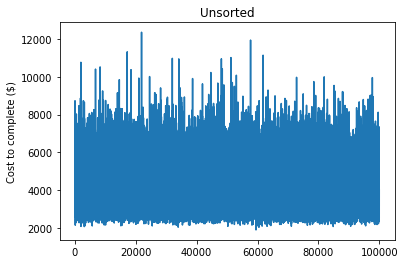

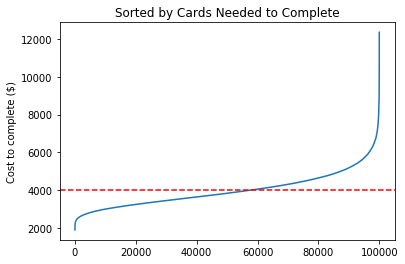

In [35]:
plt.plot(trials)
plt.title("Unsorted")
plt.ylabel("Cost to complete ($)")
plt.show()

plt.plot(sorted(trials))
plt.title("Sorted by Cards Needed to Complete")
plt.ylabel("Cost to complete ($)")
plt.axhline(y=average_to_complete * 5, color='r', linestyle='--')
plt.show()

Of course sometimes it will cost you less, but it can get pretty pricey. $10K is a lot of cigs.

Happy Puzzling!

Zach

https://zachbogart.com/